## Import Package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
NX = 47
NY = 47
x, y = np.loadtxt("../outputs/grid/x_withghost.txt").reshape(6, NX, NY), np.loadtxt("../outputs/grid//y_withghost.txt").reshape(6, NX, NY)
x_u, y_u = np.loadtxt("../outputs/grid//x_u_withghost.txt").reshape(6, NX, NY), np.loadtxt("../outputs/grid//y_u_withghost.txt").reshape(6, NX, NY)
x_v, y_v = np.loadtxt("../outputs/grid//x_v_withghost.txt").reshape(6, NX, NY), np.loadtxt("../outputs/grid//y_v_withghost.txt").reshape(6, NX, NY)
dx = (x[:, 1:, :] - x[:, :-1, :]).flatten()
dx_u = (x_u[:, 1:, :] - x_u[:, :-1, :]).flatten()
dx_v = (x_v[:, 1:, :] - x_v[:, :-1, :]).flatten()
for tmp in dx_v:
    if tmp < 100000:
        print("Wrong")

## Advection

### Sphere

In [ ]:
NX = 45
NY = 45
DT = 360.
"""
lon = np.zeros([6, NX, NY])
lat = np.zeros([6, NX, NY])
x = np.zeros([6, NX, NY])
y = np.zeros([6, NX, NY])
for p in range(6):
    lon[p] = (np.loadtxt(f"../outputs/patch{p+1}/lon.txt") * 180 / np.pi).reshape(NX, NY)
    lat[p] = (np.loadtxt(f"../outputs/patch{p+1}/lat.txt") * 180 / np.pi).reshape(NX, NY)
    x[p] = (np.loadtxt(f"../outputs/patch{p+1}/x.txt") * 180 / np.pi).reshape(NX, NY)
    y[p] = (np.loadtxt(f"../outputs/patch{p+1}/y.txt") * 180 / np.pi).reshape(NX, NY)
"""
lon = np.loadtxt("../outputs/grid//lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

x = np.loadtxt("../outputs/grid/x.txt").reshape(6, NX, NY)
y = np.loadtxt("../outputs/grid/y.txt").reshape(6, NX, NY)

count = 0
h = np.zeros([6, NX, NY])
for t in range(0, 6000, 10):
    h = np.loadtxt(f"../outputs/h/h_{t*10}.txt").reshape(6, NX, NY)

    plt.figure(figsize=(18,8))
    plt.xlabel("LON")
    plt.ylabel("LAT")
    plt.title(f"t = {t * 10 * DT / 60} min", fontsize=14)

    plt.contourf(lon[0], lat[0], h[0], levels=np.linspace(-1200, 1200, 13), extend='both')
    plt.contourf(lon[1], lat[1], h[1], levels=np.linspace(-1200, 1200, 13), extend='both')
    plt.contourf(lon[2, 0:NX//2, :], lat[2, 0:NX//2, :], h[2, 0:NX//2, :], levels=np.linspace(-1200, 1200, 13), extend='both')
    plt.contourf(lon[2, NX//2:, :]-360, lat[2, NX//2:, :], h[2, NX//2:, :], levels=np.linspace(-1200, 1200, 13), extend='both')
    plt.contourf(lon[3]-360, lat[3], h[3], levels=np.linspace(-1200, 1200, 12), extend='both')
    plt.contourf(lon[4], lat[4], h[4], levels=np.linspace(-1200, 1200, 13), extend='both')
    plt.contourf(lon[5], lat[5], h[5], levels=np.linspace(-1200, 1200, 13), extend='both')
    cbar = plt.colorbar(pad=0.05)
    cbar.set_ticks(np.linspace(-1200, 1200, 13))

    plt.savefig(f"../graphs/h/sphere/{count}.png", dpi=150)
    plt.close()
    count += 1


### Curvilinear

KeyboardInterrupt: 

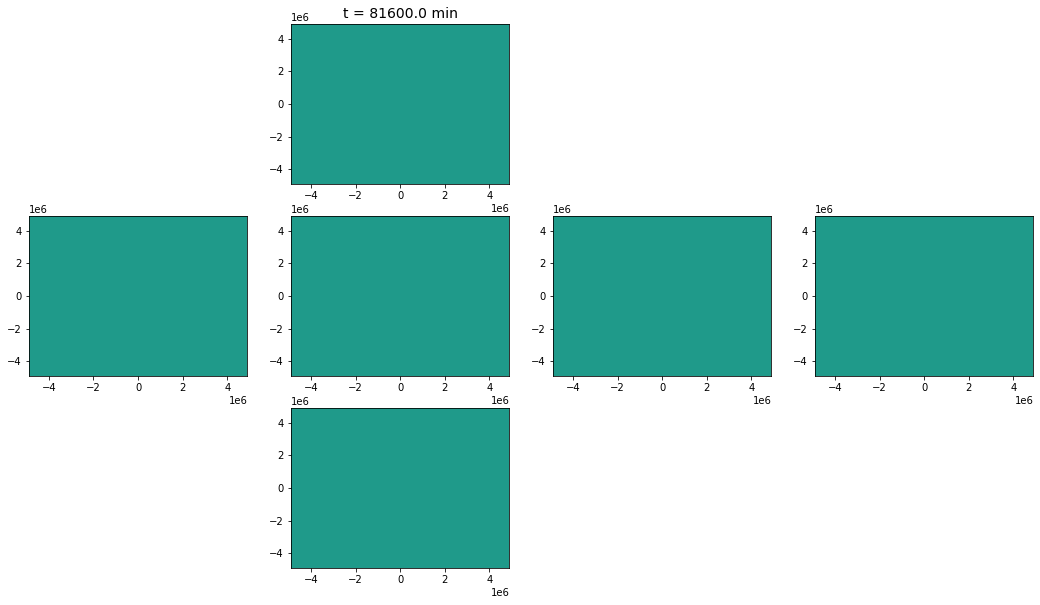

In [19]:
NX = 45
NY = 45
DT = 360.
lon = np.loadtxt("../outputs/grid/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

x = np.loadtxt("../outputs/grid/x.txt").reshape(6, NX, NY)
y = np.loadtxt("../outputs/grid/y.txt").reshape(6, NX, NY)

count = 0
h = np.zeros([6, NX, NY])
for t in range(0, 6000, 10):
    h = np.loadtxt(f"../outputs/h/h_{t*10}.txt").reshape(6, NX, NY)

    fig = plt.figure(figsize=(18,10))
    ax5 = fig.add_subplot(3,4,2)
    ax4 = fig.add_subplot(3,4,5)
    ax1 = fig.add_subplot(3,4,6)
    ax2 = fig.add_subplot(3,4,7)
    ax3 = fig.add_subplot(3,4,8)
    ax6 = fig.add_subplot(3,4,10)
    ax5.set_title(f"t = {t * 10 * DT / 60} min", fontsize=14)

    ax1.contourf(x[0], y[0], h[0], levels=np.linspace(-120, 120, 13), extend='both')
    ax2.contourf(x[1], y[1], h[1], levels=np.linspace(-120, 120, 13), extend='both')
    ax3.contourf(x[2], y[2], h[2], levels=np.linspace(-120, 120, 13), extend='both')
    ax4.contourf(x[3], y[3], h[3], levels=np.linspace(-120, 120, 13), extend='both')
    ax5.contourf(x[4], y[4], h[4], levels=np.linspace(-120, 120, 13), extend='both')
    ax6.contourf(x[5], y[5], h[5], levels=np.linspace(-120, 120, 13), extend='both')

    plt.savefig(f"../graphs/h/curvilinear/{count}.png", dpi=150)
    plt.close()
    count += 1

## Geostrophy

### Sphere

In [15]:
NX = 45
NY = 45
DT = 360.
# DT = 100
lon = np.loadtxt("../outputs/grid/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

x = np.loadtxt("../outputs/grid/x.txt").reshape(6, NX, NY)
y = np.loadtxt("../outputs/grid/y.txt").reshape(6, NX, NY)

count = 0
h = np.zeros([6, NX, NY])
leap = 80
for t in range(0, 6000, 10):

    h = np.loadtxt(f"../outputs/h/h_{t*leap}.txt").reshape(6, NX, NY)
    u = np.loadtxt(f"../outputs/u_lon_lat/u_lon_lat_{t*leap}.txt").reshape(6, NX, NY)
    v = np.loadtxt(f"../outputs/v_lon_lat/v_lon_lat_{t*leap}.txt").reshape(6, NX, NY)

    plt.figure(figsize=(18,8))
    plt.xlabel("LON")
    plt.ylabel("LAT")
    plt.title(f"t = {t * leap * DT / 60} min", fontsize=14)

    plt.contourf(lon[0], lat[0], h[0], levels=np.linspace(-1, 1, 9), extend='both')
    plt.contourf(lon[1], lat[1], h[1], levels=np.linspace(-1, 1, 9), extend='both')
    plt.contourf(lon[2, 0:NX//2, :], lat[2, 0:NX//2, :], h[2, 0:NX//2, :], levels=np.linspace(-1, 1, 9), extend='both')
    plt.contourf(lon[2, NX//2:, :]-360, lat[2, NX//2:, :], h[2, NX//2:, :], levels=np.linspace(-1, 1, 9), extend='both')
    plt.contourf(lon[3]-360, lat[3], h[3], levels=np.linspace(-1, 1, 9), extend='both')
    plt.contourf(lon[4], lat[4], h[4], levels=np.linspace(-1, 1, 9), extend='both')
    plt.contourf(lon[5], lat[5], h[5], levels=np.linspace(-1, 1, 9), extend='both')
    cbar = plt.colorbar(pad=0.05)
    cbar.set_ticks(np.linspace(-1, 1, 9))

    # plt.contourf(lon[0], lat[0], h[0], extend='both')
    # plt.contourf(lon[1], lat[1], h[1], extend='both')
    # plt.contourf(lon[2, 0:NX//2, :], lat[2, 0:NX//2, :], h[2, 0:NX//2, :], extend='both')
    # plt.contourf(lon[2, NX//2:, :]-360, lat[2, NX//2:, :], h[2, NX//2:, :], extend='both')
    # plt.contourf(lon[3]-360, lat[3], h[3], extend='both')
    # plt.contourf(lon[4], lat[4], h[4], extend='both')
    # plt.contourf(lon[5], lat[5], h[5], extend='both')
    # cbar = plt.colorbar(pad=0.05)
    # cbar.set_ticks(np.linspace(-12, 12, 13))

    plt.quiver(lon[0][::2, ::2], lat[0][::2, ::2], u[0][::2, ::2], v[0][::2, ::2], angles='xy', units="width", scale=100)
    plt.quiver(lon[1][::2, ::2], lat[1][::2, ::2], u[1][::2, ::2], v[1][::2, ::2], angles='xy', units="width", scale=100)
    plt.quiver(lon[2, 0:NX//2, :][::2, ::2], lat[2, 0:NX//2, :][::2, ::2], u[2, 0:NX//2, :][::2, ::2], v[2, 0:NX//2, :][::2, ::2], angles='xy', units="width", scale=100)
    plt.quiver(lon[2, NX//2:, :][::2, ::2]-360, lat[2, NX//2:, :][::2, ::2], u[2, NX//2:, :][::2, ::2], v[2, NX//2:, :][::2, ::2], angles='xy', units="width", scale=100)
    plt.quiver(lon[3][::2, ::2]-360, lat[3][::2, ::2], u[3][::2, ::2], v[3][::2, ::2], angles='xy', units="width", scale=100)
    plt.quiver(lon[4][::2, ::2], lat[4][::2, ::2], u[4][::2, ::2], v[4][::2, ::2], angles='xy', units="width", scale=100)
    Q = plt.quiver(lon[5][::2, ::2], lat[5][::2, ::2], u[5][::2, ::2], v[5][::2, ::2], angles='xy', units="width", scale=100)
    qk = plt.quiverkey(Q, 0.7, 0.9, 0.5, r'$5 \frac{m}{s}$', labelpos='E', coordinates='figure')

    plt.savefig(f"../graphs/h/sphere/{count}.png", dpi=150)
    plt.close()
    count += 1


OSError: ../outputs/h/h_35200.txt not found.

### Curvilinear

KeyboardInterrupt: 

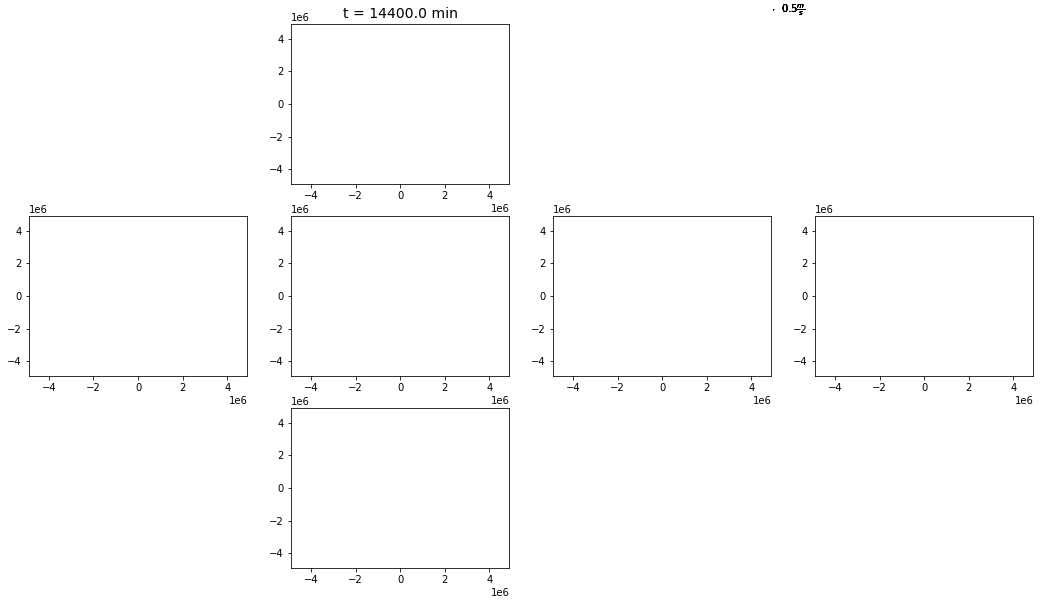

In [16]:
NX = 45
NY = 45
DT = 360.
lon = np.loadtxt("../outputs/grid/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

x = np.loadtxt("../outputs/grid/x.txt").reshape(6, NX, NY)
y = np.loadtxt("../outputs/grid/y.txt").reshape(6, NX, NY)

count = 0
leap = 80
h = np.zeros([6, NX, NY])
for t in range(0, 6000, 10):
    h = np.loadtxt(f"../outputs/h/h_{t*leap}.txt").reshape(6, NX, NY)
    u = np.loadtxt(f"../outputs/u/u_{t*leap}.txt").reshape(6, NX, NY)
    v = np.loadtxt(f"../outputs/v/v_{t*leap}.txt").reshape(6, NX, NY)

    fig = plt.figure(figsize=(18,10))
    ax5 = fig.add_subplot(3,4,2)
    ax4 = fig.add_subplot(3,4,5)
    ax1 = fig.add_subplot(3,4,6)
    ax2 = fig.add_subplot(3,4,7)
    ax3 = fig.add_subplot(3,4,8)
    ax6 = fig.add_subplot(3,4,10)
    ax5.set_title(f"t = {t * leap * DT / 60} min", fontsize=14)

    ax1.contourf(x[0], y[0], h[0], levels=np.linspace(-1, 1, 9), extend='both')
    ax2.contourf(x[1], y[1], h[1], levels=np.linspace(-1, 1, 9), extend='both')
    ax3.contourf(x[2], y[2], h[2], levels=np.linspace(-1, 1, 9), extend='both')
    ax4.contourf(x[3], y[3], h[3], levels=np.linspace(-1, 1, 9), extend='both')
    ax5.contourf(x[4], y[4], h[4], levels=np.linspace(-1, 1, 9), extend='both')
    ax6.contourf(x[5], y[5], h[5], levels=np.linspace(-1, 1, 9), extend='both')

    # ax1.contourf(x[0], y[0], h[0], extend='both')
    # ax2.contourf(x[1], y[1], h[1], extend='both')
    # ax3.contourf(x[2], y[2], h[2], extend='both')
    # ax4.contourf(x[3], y[3], h[3], extend='both')
    # ax5.contourf(x[4], y[4], h[4], extend='both')
    # ax6.contourf(x[5], y[5], h[5], extend='both')

    Q = ax1.quiver(x[0], y[0], u[0], v[0], angles='xy', units="width", scale=100)
    ax2.quiver(x[1], y[1], u[1], v[1], angles='xy', units="width", scale=100)
    ax3.quiver(x[2], y[2], u[2], v[2], angles='xy', units="width", scale=100)
    ax4.quiver(x[3], y[3], u[3], v[3], angles='xy', units="width", scale=100)
    ax5.quiver(x[4], y[4], u[4], v[4], angles='xy', units="width", scale=100)
    ax6.quiver(x[5], y[5], u[5], v[5], angles='xy', units="width", scale=100)

    ax1.quiverkey(Q, 0.7, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')  
    ax2.quiverkey(Q, 0.7, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')  
    ax3.quiverkey(Q, 0.7, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')  
    ax4.quiverkey(Q, 0.7, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')  
    ax5.quiverkey(Q, 0.7, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')  
    ax6.quiverkey(Q, 0.7, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')   
    
    plt.savefig(f"../graphs/h/curvilinear/{count}.png", dpi=150)
    plt.close()
    count += 1

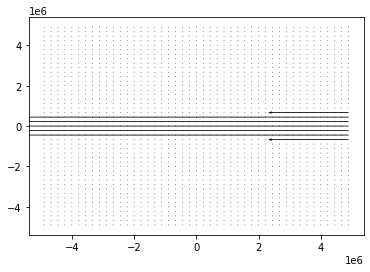

-4.21054e-57


In [71]:
t = 10
h = np.loadtxt(f"../outputs/h/h_{t*10}.txt").reshape(6, NX, NY)
u = np.loadtxt(f"../outputs/u/u_{10*t}.txt").reshape(6, NX, NY)
v = np.loadtxt(f"../outputs/v/v_{10*t}.txt").reshape(6, NX, NY)
plt.quiver(x[3], y[3], u[3], v[3])
plt.show()
print(np.min(u[3]))

##### 1d wind

In [ ]:
NX = 45
NY = 45
DT = 360.
lon = np.loadtxt("../outputs/grid/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

x = np.loadtxt("../outputs/grid/x.txt").reshape(6, NX, NY)
y = np.loadtxt("../outputs/grid/y.txt").reshape(6, NX, NY)

count = 0
h = np.zeros([6, NX, NY])
for t in range(0, 6000, 10):
    h = np.loadtxt(f"../outputs/h/h_{t*10}.txt").reshape(6, NX, NY)
    u = np.loadtxt(f"../outputs/u/u_{10*t}.txt").reshape(6, NX, NY)
    v = np.loadtxt(f"../outputs/v/v_{10*t}.txt").reshape(6, NX, NY)

    # fig = plt.figure(figsize=(18,10))
    # ax5 = fig.add_subplot(3,4,2)
    # ax4 = fig.add_subplot(3,4,5)
    # ax1 = fig.add_subplot(3,4,6)
    # ax2 = fig.add_subplot(3,4,7)
    # ax3 = fig.add_subplot(3,4,8)
    # ax6 = fig.add_subplot(3,4,10)
    # ax5.set_title(f"t = {t * 10 * DT / 60} min", fontsize=14)

    # ax1.contourf(x[0], y[0], u[0], levels=np.linspace(-12, 12, 13), extend='both')
    # ax2.contourf(x[1], y[1], u[1], levels=np.linspace(-12, 12, 13), extend='both')
    # ax3.contourf(x[2], y[2], u[2], levels=np.linspace(-12, 12, 13), extend='both')
    # ax4.contourf(x[3], y[3], u[3], levels=np.linspace(-12, 12, 13), extend='both')
    # ax5.contourf(x[4], y[4], u[4], levels=np.linspace(-12, 12, 13), extend='both')
    # ax6.contourf(x[5], y[5], u[5], levels=np.linspace(-12, 12, 13), extend='both')
    plt.plot(x[0, :, NY//2], u[0, :, NY//2])

    # ax1.contourf(x[0], y[0], h[0], extend='both')
    # ax2.contourf(x[1], y[1], h[1], extend='both')
    # ax3.contourf(x[2], y[2], h[2], extend='both')
    # ax4.contourf(x[3], y[3], h[3], extend='both')
    # ax5.contourf(x[4], y[4], h[4], extend='both')
    # ax6.contourf(x[5], y[5], h[5], extend='both')

    # ax1.quiver(x[0], y[0], u[0], v[0])
    # ax2.quiver(x[1], y[1], u[1], v[1])
    # ax3.quiver(x[2], y[2], u[2], v[2])
    # ax4.quiver(x[3], y[3], u[3], v[3])
    # ax5.quiver(x[4], y[4], u[4], v[4])
    # ax6.quiver(x[5], y[5], u[5], v[5])   

    plt.savefig(f"../graphs/wind/{count}.png", dpi=150)
    plt.close()
    count += 1

## Wind plot

#### x/y

In [ ]:
NX = 45
NY = 45
DT = 360
u = np.loadtxt("../outputs/u/u_0.txt").reshape(6, NX, NY)
v = np.loadtxt("../outputs/v/v_0.txt").reshape(6, NX, NY)
x = np.loadtxt("../outputs/grid/x.txt").reshape(6, NX, NY)
y = np.loadtxt("../outputs/grid/y.txt").reshape(6, NX, NY)
lon = np.loadtxt("../outputs/grid/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

fig = plt.figure(figsize=(18, 10))
ax5 = fig.add_subplot(342)
ax4 = fig.add_subplot(345)
ax1 = fig.add_subplot(346)
ax2 = fig.add_subplot(347)
ax3 = fig.add_subplot(348)
ax6 = fig.add_subplot(3,4,10)

ax1.quiver(x[0][::2, ::2], y[0][::2, ::2], u[0][::2, ::2], v[0][::2, ::2], angles='xy', units="width", scale=1000)
ax2.quiver(x[1][::2, ::2], y[1][::2, ::2], u[1][::2, ::2], v[1][::2, ::2], angles='xy', units="width", scale=1000)
ax3.quiver(x[2][::2, ::2], y[2][::2, ::2], u[2][::2, ::2], v[2][::2, ::2], angles='xy', units="width", scale=1000)
ax4.quiver(x[3][::2, ::2], y[3][::2, ::2], u[3][::2, ::2], v[3][::2, ::2], angles='xy', units="width", scale=1000)
Q = ax5.quiver(x[4][::2, ::2], y[4][::2, ::2], u[4][::2, ::2], v[4][::2, ::2], angles='xy', units="width", scale=1000)
ax6.quiver(x[5][::2, ::2], y[5][::2, ::2], u[5][::2, ::2], v[5][::2, ::2], angles='xy', units="width", scale=1000)
qk = plt.quiverkey(Q, 0.48, 0.975, 30, r'$30 \frac{m}{s}$', labelpos='E', coordinates='figure')
ax5.set_title("Curvilinear Coordinate")
plt.tight_layout()
plt.savefig("../graphs/wind/curvilinear.png", dpi=150)
plt.show()

#### lon/lat

In [ ]:
NX = 45
NY = 45
DT = 360.
u = np.loadtxt("../outputs/u_lon_lat/u_lon_lat_0.txt").reshape(6, NX, NY)
v = np.loadtxt("../outputs/v_lon_lat/v_lon_lat_0.txt").reshape(6, NX, NY)
lon = np.loadtxt("../outputs/grid/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

plt.figure(figsize=(18, 12))
plt.title("Spherical Coordinate")
size = 2
plt.quiver(lon[0][::size, ::size], lat[0][::size, ::size], u[0][::size, ::size], v[0][::size, ::size], scale=1500)
plt.quiver(lon[1][::size, ::size], lat[1][::size, ::size], u[1][::size, ::size], v[1][::size, ::size], scale=1500)
plt.quiver(lon[2, 0:NX//2, :][::size, ::size], lat[2, 0:NX//2, :][::size, ::size], u[2, 0:NX//2, :][::size, ::size], v[2, 0:NX//2, :][::size, ::size], scale=1500)
plt.quiver(lon[2, NX//2:, :][::size, ::size]-360, lat[2, NX//2:, :][::size, ::size], u[2, NX//2:, :][::size, ::size], v[2, NX//2:, :][::size, ::size], scale=1500)
plt.quiver(lon[3][::size, ::size]-360, lat[3][::size, ::size], u[3][::size, ::size], v[3][::size, ::size], scale=1500)
plt.quiver(lon[4][::size, ::size], lat[4][::size, ::size], u[4][::size, ::size], v[4][::size, ::size], scale=1500)
Q = plt.quiver(lon[5][::size, ::size], lat[5][::size, ::size], u[5][::size, ::size], v[5][::size, ::size], scale=1500)
qk = plt.quiverkey(Q, 0.83, 0.89, 40, r'$40 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.savefig("../graphs/wind/spherical.png", dpi=150)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.contourf(np.swapaxes(u[0], 0, 1))
plt.colorbar()
plt.show()

In [ ]:
p = 5
for t in range(0, 6000, 10):
    h = np.loadtxt(f"../outputs/patch{p}/h/h_{t*10}.txt").reshape(NX, NY)
    plt.contourf(h, levels=np.linspace(-1200, 1200, 12), extend='both')
    cbar = plt.colorbar(pad=0.05)
    cbar.set_ticks(np.linspace(-1200, 1200, 13))
    plt.show()
    plt.close()

In [ ]:
NX = 45
NY = 45
DT = 360.
lon = np.loadtxt("../outputs/grid/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/grid/lat.txt").reshape(6, NX, NY) * 180. / np.pi

lon4Panel = np.concatenate((lon[0], lon[1], lon[2], lon[3]), axis=0)
lat4Panel = np.concatenate((lat[0], lat[1], lat[2], lat[3]), axis=0)

x = np.loadtxt("../outputs/grid/x.txt").reshape(6, NX, NY)
y = np.loadtxt("../outputs/grid/y.txt").reshape(6, NX, NY)
count = 0
for t in range(0, 6000, 10):
    h = np.loadtxt(f"../outputs/h/h_{t*10}.txt").reshape(6, NX, NY)
    # u = np.loadtxt("../outputs/u/u_0.txt").reshape(6, NX, NY)
    # v = np.loadtxt("../outputs/v/v_0.txt").reshape(6, NX, NY)

    h4panel = np.concatenate((h[0], h[1], h[2], h[3]), axis=0)
    plt.figure(figsize=(18,8))
    plt.xlabel("LON")
    plt.ylabel("LAT")
    plt.title(f"t = {t * DT / 60} min", fontsize=14)
    # plt.contourf(lon4Panel, lat4Panel, h4panel)
    # CF = plt.contourf(lon4Panel, lat4Panel, h4panel, levels=np.linspace(-1000, 3000,20), extend='both')
    # cbar = plt.colorbar(pad=0.05)
    # cbar.set_ticks(np.linspace(-1000, 3000,10))
    plt.plot(h4panel[:, NX//2])
    plt.ylim(-4000, 10000)
    plt.savefig(f"../graphs/test/h_1d/{count}.png")
    plt.close()
    count += 1

## 3D plot